# Machine Learning - Deep Learning

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. For this, we will use the "Bee or Wasp?" dataset that was obtained from Kaggle and slightly rebuilt.


In [ ]:
# get the dataset

# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
# unzip data.zip

## Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps.

The dataset contains separate folders for training and test sets.

## Model
For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
  - Use 32 filters
  - Kernel size should be (3, 3) (that's the size of the filter)
  - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
 - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
 - The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:
- SGD(lr=0.002, momentum=0.8)

In [14]:
# build the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History
import numpy as np


def build_model():

    model = Sequential([
        # Convolutional layer
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        # MaxPooling layer
        MaxPooling2D(pool_size=(2, 2)),
        # Flatten layer
        Flatten(),        
        # Dense layer with 64 neurons and 'relu' activation
        Dense(64, activation='relu'),
        # Output layer with 1 neuron and 'sigmoid' activation for binary classification
        Dense(1, activation='sigmoid')
    ])
  
    # Define the SGD optimizer with the specified parameters
    optimizer = SGD(learning_rate=0.002, momentum=0.8)

    # Compile the model with binary crossentropy loss and the defined optimizer
    model.compile(optimizer=optimizer, 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

    # Print the model summary
    model.summary()

    return model

## Question 1 - Since we have a binary classification problem, what is the best loss function for us?

- mean squared error
- binary crossentropy
- categorical crossentropy
- cosine similarity

For binary classification problems, the most commonly used loss function is binary crossentropy. Binary crossentropy is suitable when you have a binary outcome (e.g., 0 or 1) and is particularly well-suited for models outputting probabilities.

##  Question 2 - What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

- 1
- 65
- 896
- 11214912

In [24]:
model = build_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                11214912  
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

## Generators and Training
For the next two questions, use the following data generator for both train and test sets:


```python
ImageDataGenerator(rescale=1./255)

```

-We don't need to do any additional pre-processing for the images.
-When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
-Use batch_size=20
-Use shuffle=True for both training and test sets.

For training use .fit() with the following params:

```python

model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

## Question 3 - What is the median of training accuracy for all the epochs for this model?

- 0.20
- 0.40
- 0.60
- 0.80

In [25]:
# Create an ImageDataGenerator for both training and test sets
datagen = ImageDataGenerator(rescale=1./255)

def get_data_gen(datagen, path):
    """
    Create an ImageDataGenerator and return the data generators for the training and test sets.
    """
    
    # Set up the data generators for the training set
    generator = datagen.flow_from_directory(
        path,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',  # Use 'binary' for binary classification
        shuffle=True
    )

    return generator

# define the path to the training and test directories
train_dir = './train'
test_dir = './test'

# Set up the data generators for the training set
train_generator = get_data_gen(datagen, train_dir)
    
# Set up the data generators for test set
test_generator = get_data_gen(datagen, test_dir)


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [44]:
# define a function to plot the loss and accuracy
import matplotlib.pyplot as plt

def plot_history(history, img_name='cnn_metrics.png'):
    """
    Plot the loss and accuracy metrics.
    """
    
    # Get the classification accuracy and loss-value
    accuracy_values = history.history['accuracy']
    loss_values = history.history['loss']

    # Get the number of epochs
    epochs = range(len(accuracy_values))

    # Calculate median and std
    median_loss = np.median(loss_values)
    std_loss = np.std(loss_values)
    median_accuracy = np.median(accuracy_values)
    std_accuracy = np.std(accuracy_values)

    # Create a bar chart for Loss
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.bar(range(1, len(loss_values) + 1), loss_values, color='blue', label='Loss')
    plt.axhline(median_loss, color='red', linestyle='dashed', linewidth=2, label='Median Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Create a bar chart for Accuracy
    plt.subplot(2, 1, 2)
    plt.bar(range(1, len(accuracy_values) + 1), accuracy_values, color='green', label='Accuracy')
    plt.axhline(median_accuracy, color='orange', linestyle='dashed', linewidth=2, label='Median Accuracy')
    plt.title('Training Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Display the charts
    plt.tight_layout()
    # plt.show()
    img_path = f'./images/{img_name}'
    plt.savefig(img_path)

    # Print median and std values
    print(f"Median Loss: {median_loss:.3f}, Standard Deviation of Loss: {std_loss:.3f}")
    print(f"Median Accuracy: {median_accuracy:.3f}, Standard Deviation of Accuracy: {std_accuracy:.3f}")


In [26]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 20s 107ms/step - loss: 0.6683 - accuracy: 0.5776 - val_loss: 0.6559 - val_accuracy: 0.5501
Epoch 2/10
184/184 [==============================] - 20s 106ms/step - loss: 0.6111 - accuracy: 0.6535 - val_loss: 0.5727 - val_accuracy: 0.6983
Epoch 3/10
184/184 [==============================] - 19s 104ms/step - loss: 0.5556 - accuracy: 0.7193 - val_loss: 0.5493 - val_accuracy: 0.7211
Epoch 4/10
184/184 [==============================] - 20s 111ms/step - loss: 0.5247 - accuracy: 0.7555 - val_loss: 0.5510 - val_accuracy: 0.7081
Epoch 5/10
184/184 [==============================] - 19s 100ms/step - loss: 0.5096 - accuracy: 0.7607 - val_loss: 0.5592 - val_accuracy: 0.7124
Epoch 6/10
184/184 [==============================] - 19s 104ms/step - loss: 0.4819 - accuracy: 0.7778 - val_loss: 0.5186 - val_accuracy: 0.7593
Epoch 7/10
184/184 [==============================] - 20s 106ms/step - loss: 0.4525 - accuracy: 0.7974 - val_loss: 0.5392 - val_ac

In [27]:
# Get the training accuracy values for each epoch
training_accuracy_values = history.history['accuracy']

# Calculate the median of training accuracy
median_training_accuracy = round(np.median(training_accuracy_values),2)

# Print the median training accuracy
print("Median Training Accuracy:", median_training_accuracy)

Median Training Accuracy: 0.77


## Question 4 - What is the standard deviation of training loss for all the epochs for this model?

- 0.031
- 0.061
- 0.091
- 0.131

In [29]:
# Get the training loss values for each epoch
training_loss_values = history.history['loss']

# Calculate the standard deviation of training loss
std_dev_training_loss = round(np.std(training_loss_values),3)

# Print the standard deviation of training loss
print("Standard Deviation of Training Loss:", std_dev_training_loss)

Standard Deviation of Training Loss: 0.087


Median Loss: 0.496, Standard Deviation of Loss: 0.087
Median Accuracy: 0.769, Standard Deviation of Accuracy: 0.078


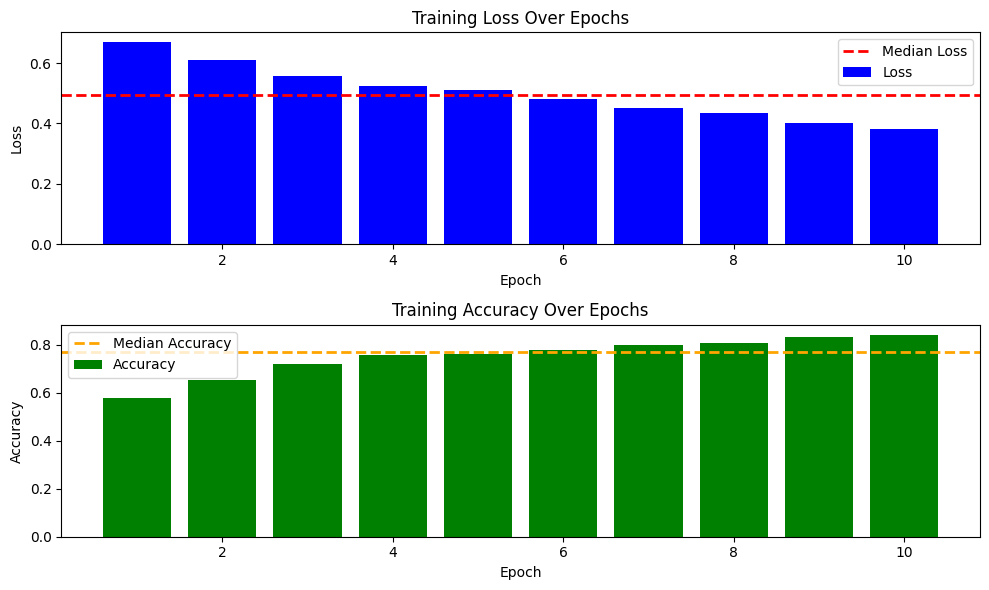

In [45]:
plot_history(history)

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- rotation_range=50,
- width_shift_range=0.1,
- height_shift_range=0.1,
- zoom_range=0.1,
- horizontal_flip=True,
- fill_mode='nearest'

In [30]:

# Create an augmented ImageDataGenerator 
augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_train_generator = get_data_gen(augmented_train_datagen, train_dir)

Found 3677 images belonging to 2 classes.


In [31]:
# Train the model with the augmented data generator
aug_history = model.fit(
    augmented_train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 33s 179ms/step - loss: 0.5021 - accuracy: 0.7658 - val_loss: 0.5737 - val_accuracy: 0.7266
Epoch 2/10
184/184 [==============================] - 32s 172ms/step - loss: 0.4897 - accuracy: 0.7713 - val_loss: 0.5561 - val_accuracy: 0.7386
Epoch 3/10
184/184 [==============================] - 34s 184ms/step - loss: 0.4785 - accuracy: 0.7762 - val_loss: 0.4859 - val_accuracy: 0.7669
Epoch 4/10
184/184 [==============================] - 32s 173ms/step - loss: 0.4836 - accuracy: 0.7716 - val_loss: 0.4968 - val_accuracy: 0.7680
Epoch 5/10
184/184 [==============================] - 30s 161ms/step - loss: 0.4998 - accuracy: 0.7629 - val_loss: 0.4758 - val_accuracy: 0.7930
Epoch 6/10
184/184 [==============================] - 32s 173ms/step - loss: 0.4779 - accuracy: 0.7735 - val_loss: 0.4814 - val_accuracy: 0.7952
Epoch 7/10
184/184 [==============================] - 31s 167ms/step - loss: 0.4644 - accuracy: 0.7879 - val_loss: 0.4724 - val_ac

## Question 5 - Let's train our model for 10 more epochs using the same code as previously.

> Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.18
- 0.48
- 0.78
- 0.108

In [32]:
# get the mean of all the epochs for the test loss for the augmented model
aug_test_loss = round(np.mean(aug_history.history['loss']), 2)

# print the mean of the test loss for the aumented model
print("Mean of the Test Loss for the Augmented Model:", aug_test_loss)

Mean of the Test Loss for the Augmented Model: 0.48


## Question 6 - What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.38
- 0.58
- 0.78
- 0.98

In [33]:
# average of epochs 6 to 10 for the test accuracy for the augmented model 
aug_test_accuracy = round(np.mean(aug_history.history['accuracy'][5:]), 2)

# print the average of epochs 6 to 10 for the test accuracy for the augmented model
print("Average of the Test Accuracy for the Augmented Model:", aug_test_accuracy)


Average of the Test Accuracy for the Augmented Model: 0.78


Median Loss: 0.478, Standard Deviation of Loss: 0.015
Median Accuracy: 0.775, Standard Deviation of Accuracy: 0.009


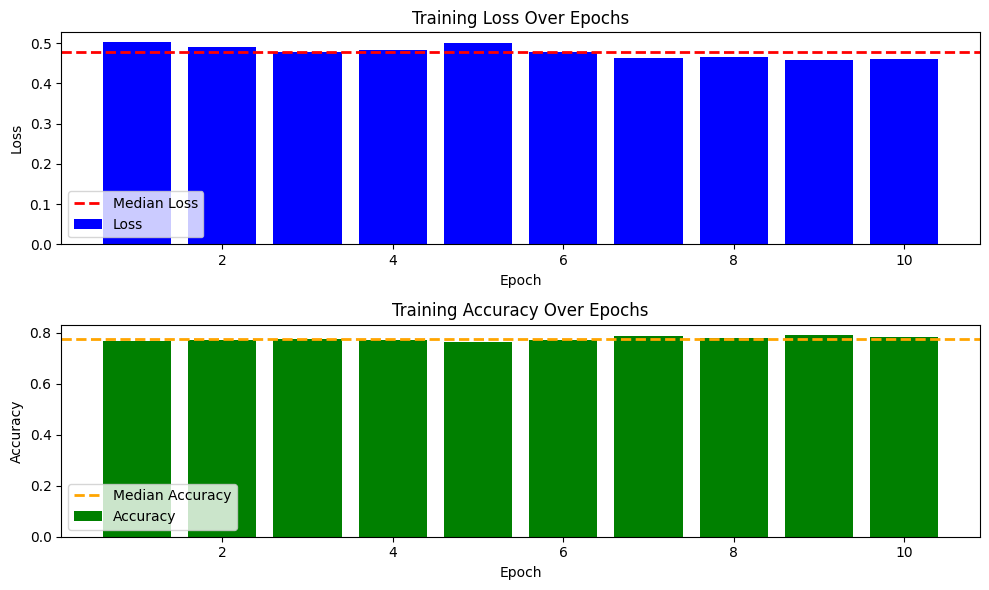

In [46]:
plot_history(aug_history,'cnn_metrics_augmented.png')